<hr>
24-Feb-23     CBL       Original, analyze the big loop antenna, 15 turns on 23.5" diameter hoop. 
<hr>
<ul>
    <li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Plotting.html </li>
    <li> github associated with this: https://github.com/scikit-rf/ </li>
    <li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Networks.html </li>
    <li> https://www.antenna-theory.com/tutorial/smith/chart.php </li>
</ul>
<br>
Sweeps were from 0.5-2MHz
<br>
The big loop is composed of a hoop of 23.125 inches in diameter with 15 turns of #22 wire on it. <br> 
Calculated values: <br> 
Inductance: 277uH <br>
<br>
This should easily tune the BC band. <br>
<table>
    <tr>
        <th> Capacitor </th>
        <th> Frequency </th>
        <th> Impedance </th>
    </tr>
    <tr>
        <td> 365pF </td>
        <td> 0.5MHz</td>
        <td> 871 ohms </td>
    </tr>
    <tr>
        <td> 20pF </td>
        <td> 2.8MHz </td>
        <td> 3720 ohms </td> 
    </tr>
</table>

In [1]:
import numpy as np               # numpy is all the numerical stuff
import matplotlib.pyplot as plt  # I happen to always include this so I can make plots
import skrf as rf                # this is part of the overall SCIKIT-RF
from skrf import Network         # How do I create the network?
from skrf import Frequency       # for making up an array of frequency values
from skrf import plotting        # Plotting
import math                      # Additional math stuff. not always used. 

In [2]:
def Inductance(F,Z):
    """
    @param F - frequency in Hz
    @param Z - imarinary impedance in ohms
    """
    omega = 2.0*np.pi*F
    Z_imag = np.imag(Z)
    X = Z_imag.reshape(Z_imag.size)
    L = np.divide(X, omega)
    return L

In [3]:
def Capacitance(F,Z):
    """
    @param F - frequency in Hz
    @param Z - impedance in ohms
    """
    omega = 2.0*np.pi*F
    Z_imag = np.imag(Z)
    X = Z_imag.reshape(Z_imag.size)
    C = 1.0/(omega*X)
    return C

In [4]:
def Freq(L,C):
    """
    @param L - inductance in H
    @param C - capacitance in F
    """
    return 1.0/(2.0*np.pi*np.sqrt(L*C))

1-Port Network: '230224_365_BigLoop',  500000.0-2000000.0 Hz, 101 pts, z0=[50.+0.j]


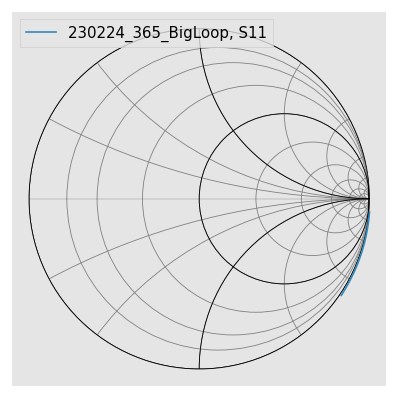

In [5]:
# Load and plot the Big Loop antenna with at 365pF in parallel with the loop
pF365 = Network('Antenna/230224_365_BigLoop.s1p')
print(pF365)
rf.stylely()
pF365.plot_s_smith()

From nanonvna_saver screen, why are my calculated values different? 
<img src="Antenna/230224/pF365.png">

In [6]:
vals = [0,50,100]
for index in vals:
    print('F: ',pF365.f[index], ' Z: ', pF365.z[index])
    print('L: ', Inductance(pF365.f[index], pF365.z[index])*1e6, ' uH')
    print('Capacitance: ', Capacitance(pF365.f[index], pF365.z[index])*1.0e12, ' pF')

F:  500000.0  Z:  [[-59.04461198-1276.50555779j]]
L:  [-406.32433881]  uH
Capacitance:  [-249.36036059]  pF
F:  1250000.0  Z:  [[-4.54709221-278.26444613j]]
L:  [-35.42972967]  uH
Capacitance:  [-457.56458018]  pF
F:  2000000.0  Z:  [[-2.78659249-162.34409872j]]
L:  [-12.9189329]  uH
Capacitance:  [-490.1777901]  pF


So, Things aren't so different, but what does it mean when the inductance is negative or the resistance is negative
in these calculations? 

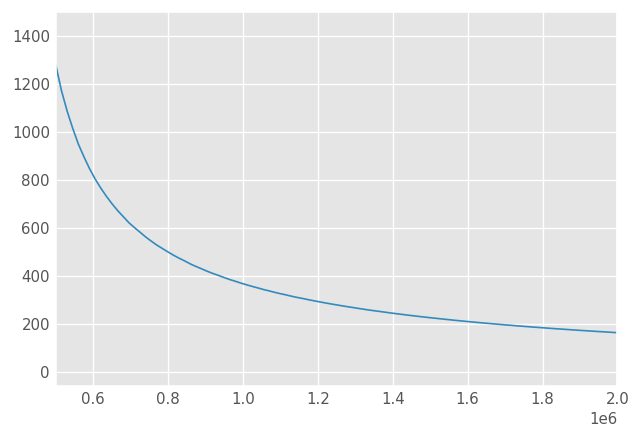

In [7]:
f = pF365.f
zmag = np.absolute(pF365.z)
abz = zmag.reshape(zmag.size)
plt.plot(f,abz)

need to sweep lower in frequency. 

1-Port Network: '230224_20pF_BigLoop',  500000.0-2000000.0 Hz, 101 pts, z0=[50.+0.j]


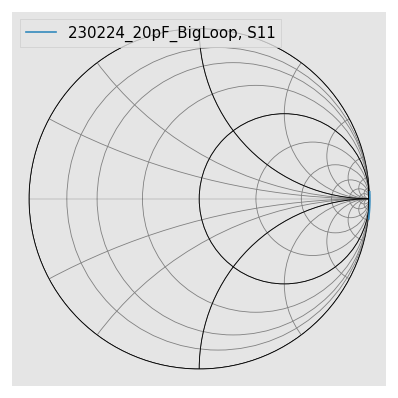

In [8]:
# Load and plot the Big Loop antenna with at 365pF in parallel with the loop
pF20 = Network('Antenna/230224_20pF_BigLoop.s1p')
print(pF20)
pF20.plot_s_smith()

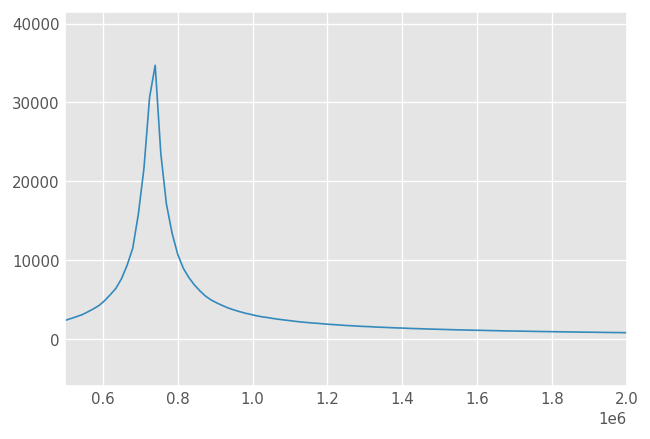

In [9]:
f = pF20.f
zmag = np.absolute(pF20.z)
abz = zmag.reshape(zmag.size)
plt.plot(f,abz)

This implies that the self capacitance is wicked bad. 20pF should have been around 2.8MHz

1-Port Network: 'LoopAntenna1',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]


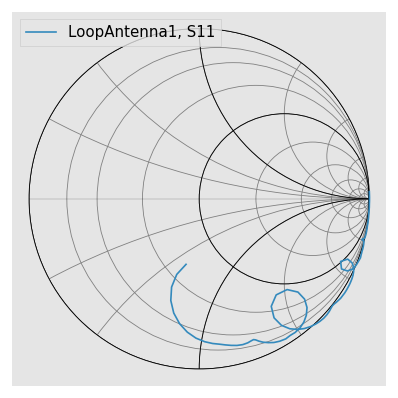

In [18]:
# Big loop Raw
Loop1A = Network('Antenna/LoopAntenna1.s1p')
print(Loop1A)
Loop1A.plot_s_smith()

In [19]:
index = 50
C = Capacitance(Loop1A.f[index], Loop1A.z[index])
L = Inductance(Loop1A.f[index], Loop1A.z[index])
print('F: ', Loop1A.f[index], ' ', L*1.0e6, ' uH')
print('Capacitance: ', C*1.0e12, ' pF')
print('Self Resonance: ', Freq(L,C))

F:  10250000.0   [-2.3079475]  uH
Capacitance:  [-104.46398942]  pF
Self Resonance:  [10250000.]
